In [1]:
import pandas as pd
from utils import *

In [2]:
log_chat = pd.read_csv("tin nhan 12-04.csv")

In [3]:
log_chat.head()

ID  CHAT_ID  AUTHOR_ID  \
0  82933255  1106913          0   
1  82933257  1106913     821729   
2  82933256  1106913          0   
3  82933260  1106913          0   
4  82950380  1106913          0   

                                             MESSAGE MESSAGE_OUT  \
0  Cuộc hỗ trợ #[URL=/online/?IM_HISTORY=imol|390...         NaN   
1  Ad ơi mình ở Thụy Khuê đang dùng modem VNPT 2 ...         NaN   
2  Hội thoại đã được phân phối đến tất cả tổng đà...         NaN   
3  Thời gian hỗ trợ online của VNPT bắt đầu từ 7h...         NaN   
4  [USER=2060]Đỗ Minh Chung[/USER] đã chọn cuộc t...         NaN   

           DATE_CREATE EMAIL_TEMPLATE  NOTIFY_TYPE NOTIFY_MODULE NOTIFY_EVENT  \
0  2022-04-12 00:05:26             \N            0            im        group   
1  2022-04-12 00:05:26             \N            0            im        group   
2  2022-04-12 00:05:27             \N            0            im        group   
3  2022-04-12 00:05:27             \N            0            im        group   
4  2022-04-12 07:40:02             \N            0            im        group   

   ... NOTIFY_BUTTONS NOTIFY_READ IMPORT_ID PARENT_ID IS_LIKE IS_HIDDEN  \
0  ...             \N           N        \N        \N      \N        \N   
1  ...             \N           N        \N        \N      \N        \N   
2  ...             \N           N        \N        \N      \N        \N   
3  ...             \N           N        \N        \N      \N        \N   
4  ...             \N           N        \N        \N      \N        \N   

  FILTER_STATUS PRIVATE_REPLIES IS_MESSAGE_BOT AVG_MESSAGE_BOT  
0            \N             NaN             \N              \N  
1           NaN             NaN             \N              \N  
2            \N             NaN             \N              \N  
3            \N             NaN             \N              \N  
4            \N             NaN             \N              \N  

[5 rows x 23 columns]

In [4]:
short_log = log_chat[["CHAT_ID", "AUTHOR_ID", "MESSAGE", "DATE_CREATE"]]

In [5]:
short_log.head()

CHAT_ID  AUTHOR_ID                                            MESSAGE  \
0  1106913          0  Cuộc hỗ trợ #[URL=/online/?IM_HISTORY=imol|390...   
1  1106913     821729  Ad ơi mình ở Thụy Khuê đang dùng modem VNPT 2 ...   
2  1106913          0  Hội thoại đã được phân phối đến tất cả tổng đà...   
3  1106913          0  Thời gian hỗ trợ online của VNPT bắt đầu từ 7h...   
4  1106913          0  [USER=2060]Đỗ Minh Chung[/USER] đã chọn cuộc t...   

           DATE_CREATE  
0  2022-04-12 00:05:26  
1  2022-04-12 00:05:26  
2  2022-04-12 00:05:27  
3  2022-04-12 00:05:27  
4  2022-04-12 07:40:02

In [6]:
dialogs = to_dialogs(short_log)

In [7]:
# count = 0
# for chat_id, dialog in dialogs.items():
#     for i in range(len(dialog)):
#         if dialog[i]["message"].startswith("Cuộc hỗ trợ #[URL") and dialog[i]["message"].endswith("đã bắt đầu"):
#             if i == 2:
#                 count += 1
#                 break
# print(count)

In [8]:
new_dialogs = split_dialog_to_section(dialogs)

In [9]:
total_chat, no_reply, no_chat, len_message = counts_dialogs_number(new_dialogs)

In [10]:
print(f"Số lượng đoạn chat giữa người dùng và điện thoại viên: {total_chat}")

Số lượng đoạn chat giữa người dùng và điện thoại viên: 1098


In [11]:
print(f"Số lượng câu chat người dùng và điện thoại viên: {len(len_message)}")

Số lượng câu chat người dùng và điện thoại viên: 8309


In [12]:
print("Thống kê thông số chiều dài câu chat:")
return_statics(len_message)

Thống kê thông số chiều dài câu chat:
mean: 16.816584426525456
max: 464
min: 1


In [13]:
staff_ids = get_staff_ids(new_dialogs)

In [14]:
len_user_message = count_len_message_user(new_dialogs, staff_ids)

In [15]:
print("Thống kê thông số chiều dài câu chat của người dùng:")
return_statics(len_user_message)

Thống kê thông số chiều dài câu chat của người dùng:
mean: 8.142528735632183
max: 445
min: 1


In [16]:
flat_turn_bots, flat_turn_staffs = return_statics_turn(new_dialogs)

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

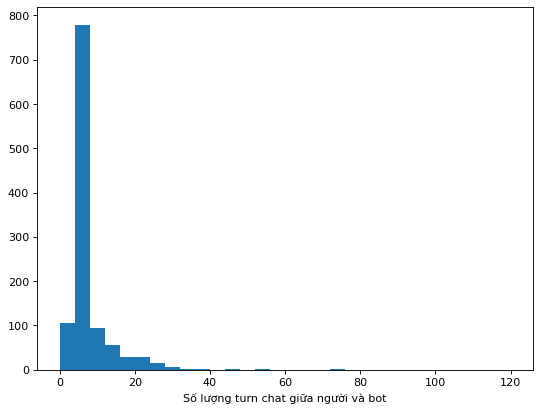

In [18]:
figure(figsize=(8, 6), dpi=80)
plt.hist(flat_turn_bots, bins=30, range=(0,120))
plt.xlabel('Số lượng turn chat giữa người và bot')
plt.show()

In [19]:
print(f"Số lượng turn chat giữa người và bot: {sum(flat_turn_bots)}")
print("Thống kê thông số chiều dài turn chat giữa người và bot:")
return_statics(flat_turn_bots)

Số lượng turn chat giữa người và bot: 7243
Thống kê thông số chiều dài turn chat giữa người và bot:
mean: 6.466964285714286
max: 74
min: 0


Text(0.5, 0, 'Số lượng turn chat giữa người và điện thoại viên')

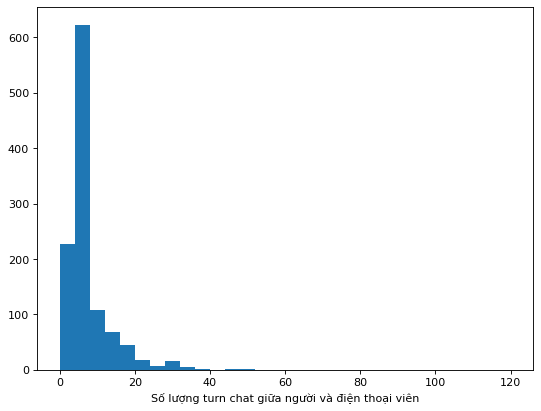

In [20]:
figure(figsize=(8, 6), dpi=80)
plt.hist(flat_turn_staffs, bins=30, range=(0,120))
plt.xlabel('Số lượng turn chat giữa người và điện thoại viên')

In [21]:
print(f"Số lượng turn chat giữa người và điện thoại viên: {sum(flat_turn_staffs)}")
print("Thống kê thông số chiều dài turn chat giữa người và điện thoại viên:")
return_statics(flat_turn_staffs)

Số lượng turn chat giữa người và điện thoại viên: 8278
Thống kê thông số chiều dài turn chat giữa người và điện thoại viên:
mean: 7.391071428571428
max: 126
min: 1


In [22]:
count_like, count_dislike = count_like_dislike(new_dialogs)

In [23]:
print(f"Tỷ lệ like: {count_like/total_chat*100}")
print(f"Tỷ lệ dislike: {count_dislike/total_chat*100}")

Tỷ lệ like: 52.459016393442624
Tỷ lệ dislike: 1.0018214936247722


In [24]:
print_dialog(new_dialogs, 601, staff_ids)

Bot:    Cuộc hỗ trợ #[URL=/online/?IM_HISTORY=imol|3907578]3907578[/URL] đã bắt đầu
Bot:    Hội thoại đã được phân phối đến tất cả tổng đài viên trong hàng đợi
Client: hi
Bot:     Xin chào Anh/Chị. Em là AMI, trợ lý ảo của VNPT. Em có thể hỗ trợ Anh/Chị giải đáp các dịch vụ nào dưới đây: Dịch vụ Di động?ic_bot_button_139746Dịch vụ Internet - MyTV - Cố định?ic_bot_button_139740Dịch vụ Công nghệ - Thông tin?ic_bot_button_153116Dịch vụ Mobile Money?ic_bot_button_139967
Client: nv
Bot:     AMI xin phép chuyển yêu cầu của Anh/Chị đến Nhân viên CSKH để được hỗ trợ nhanh nhất. Anh/Chị vui lòng lựa chọn chuyển tới nhân viên CSKH giải đáp các dịch vụ dưới đây: Nhân viên HTKH Di động?ic_bot_button_152522Nhân viên HTKH Băng rộng - Cố định?ic_bot_button_152523Nhân viên HTKH CNTT?ic_bot_button_152524
Client: ?ic_bot_button_152524
Bot:    Yêu cầu của Anh/Chị đã được AMI chuyển đến Nhân viên CSKH, Anh/Chị vui lòng chờ trong giây lát ạ.
Bot:    [USER=294]Nguyễn Nho Dạ Thảo[/USER] đã chọn cuộc trò chuy